# Background
- Load in all diff images with zero bubbles and average each at each pixel location.
- The goal here is to be able to subtract some of the consistent relics in the diff frames to increase feature separation.

In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import imageio

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

In [12]:
datadir = "../bubbleimages/"
plotdir = "../bubbleimages/plots/"

# Load CSV into DataFrame

In [3]:
df = pd.read_csv(datadir+"bubnums.csv", names=["timestamp", "N_bubs"])

In [4]:
df

timestamp  N_bubs
0       20170623_3_0       0
1       20170623_3_1       0
2       20170623_3_2       0
3       20170623_3_3       0
4       20170623_3_4       0
...              ...     ...
24769   20171011_9_5       2
24770   20171011_9_6       1
24771   20171011_9_7       0
24772   20171011_9_8       0
24773  20171011_10_0       1

[24774 rows x 2 columns]

# Find all existing diff files

In [5]:
diff_files = os.listdir(datadir+'diff/')

In [6]:
N = len(diff_files)

In [7]:
N

24697

In [8]:
len(df) - N

77

- 77 fewer diff files than entries in csv, so need to check for each df entry if `diff_file` exists

# Pick CSV entries with 0 bubbles

In [9]:
zb = df.N_bubs == 0
df0 = df[zb]

In [10]:
len(df0), len(df)

(17441, 24774)

# Generate Averaged 2d `np.array`

In [11]:
image_sum = [] # empty list to store image 2d np.arrays
# loop through timestamps in csv file
for i, f in enumerate(df0.timestamp):
    f = f + '_diff.bmp'
    if f in diff_files: # check if file exists
        image = imageio.imread(datadir+'diff/'+f) # read image file
        image_sum.append(image) # append to container
image_sum = np.array(image_sum) # create np.array from list of np.arrays
image_avg = np.mean(image_sum, axis=0) # calculate average for each pixel

# Pickle Averaged Frame

In [13]:
pkl.dump(image_avg, open('AvgFrame0Bubbles.p', 'wb'))

In [14]:
image_avg

array([[243.62272518, 243.6833103 , 243.58978346, ..., 245.48946095,
        245.50956001, 245.55448053],
       [243.67277125, 243.61800276, 243.73629348, ..., 245.56692006,
        245.6033748 , 245.64005989],
       [243.44419489, 243.57884128, 243.63297627, ..., 245.61034324,
        245.61546879, 245.57590417],
       ...,
       [245.76434001, 245.82947478, 245.74498963, ..., 245.40831606,
        245.33252707, 245.1640751 ],
       [245.8545842 , 245.89507026, 245.98266528, ..., 245.1033748 ,
        245.10107118, 245.30453812],
       [245.83598249, 245.97638793, 245.92438378, ..., 245.1184059 ,
        245.06571067, 245.06542271]])

# Load Pickled Frame

In [21]:
image_avg = pkl.load(open('AvgFrame0Bubbles.p', 'rb'))

In [17]:
image_avg

array([[243.62272518, 243.6833103 , 243.58978346, ..., 245.48946095,
        245.50956001, 245.55448053],
       [243.67277125, 243.61800276, 243.73629348, ..., 245.56692006,
        245.6033748 , 245.64005989],
       [243.44419489, 243.57884128, 243.63297627, ..., 245.61034324,
        245.61546879, 245.57590417],
       ...,
       [245.76434001, 245.82947478, 245.74498963, ..., 245.40831606,
        245.33252707, 245.1640751 ],
       [245.8545842 , 245.89507026, 245.98266528, ..., 245.1033748 ,
        245.10107118, 245.30453812],
       [245.83598249, 245.97638793, 245.92438378, ..., 245.1184059 ,
        245.06571067, 245.06542271]])

In [16]:
%timeit image_avg = pkl.load(open('AvgFrame0Bubbles.p', 'rb'))

360 µs ± 7.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- Only needs to process once (a few minutes), then loading pickled file takes <1 ms.

# Inverting Average
- If you want to work in an inverted space, where bubbles are 'bright spots' (i.e. higher pixel intensity), run this simple subtraction.

In [22]:
invert = True

In [23]:
if invert:
    image_avg = 255 - image_avg

In [24]:
image_avg

array([[11.37727482, 11.3166897 , 11.41021654, ...,  9.51053905,
         9.49043999,  9.44551947],
       [11.32722875, 11.38199724, 11.26370652, ...,  9.43307994,
         9.3966252 ,  9.35994011],
       [11.55580511, 11.42115872, 11.36702373, ...,  9.38965676,
         9.38453121,  9.42409583],
       ...,
       [ 9.23565999,  9.17052522,  9.25501037, ...,  9.59168394,
         9.66747293,  9.8359249 ],
       [ 9.1454158 ,  9.10492974,  9.01733472, ...,  9.8966252 ,
         9.89892882,  9.69546188],
       [ 9.16401751,  9.02361207,  9.07561622, ...,  9.8815941 ,
         9.93428933,  9.93457729]])

# Plot Averaged Frame

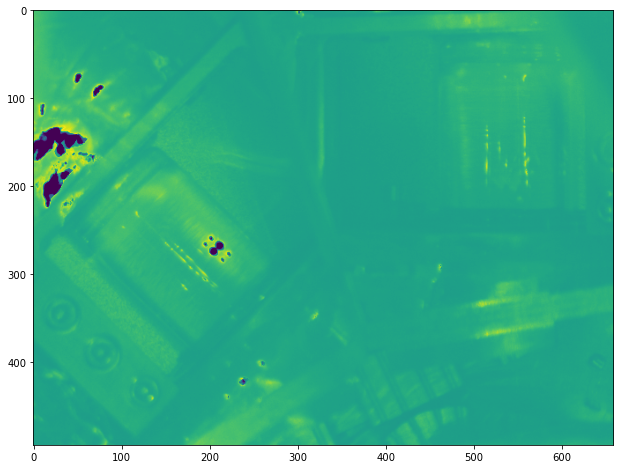

In [25]:
fig = plt.figure()
plt.imshow(image_avg)
fig.savefig(plotdir+'diff_avg_inv.pdf')
fig.savefig(plotdir+'diff_avg_inv.png')

- Can see a lot of detector features in this average...maybe the average over all frames is not the best solution.

# Example of Subtraction

In [26]:
def subtraction_plots(fname, N_bubs):
    dimage= imageio.imread(datadir+'diff/'+fname+'_diff.bmp')
    timage = imageio.imread(datadir+'trig/'+fname+'_trig.bmp')
    if invert:
        dimage = 255 - dimage
    # subtract averaged frame
    dimage_min_avg = dimage - image_avg
    # generate plots
    # trig
    fig = plt.figure()
    plt.imshow(timage)
    fig.savefig(plotdir+f'trig_{N_bubs}.pdf')
    fig.savefig(plotdir+f'trig_{N_bubs}.png')
    # diff
    fig = plt.figure()
    plt.imshow(dimage)
    fig.savefig(plotdir+f'diff_{N_bubs}_inv.pdf')
    fig.savefig(plotdir+f'diff_{N_bubs}_inv.png')
    # subtract
    fig = plt.figure()
    plt.imshow(dimage_min_avg)
    fig.savefig(plotdir+f'subavg_diff_{N_bubs}_inv.pdf')
    fig.savefig(plotdir+f'subavg_diff_{N_bubs}_inv.png')

In [37]:
f0 = df[df.N_bubs == 0].sample(1).timestamp.values[0]
f4 = df[df.N_bubs == 4].sample(1).timestamp.values[0]

In [40]:
f0, f4

('20170629_4_75', '20171001_8_25')

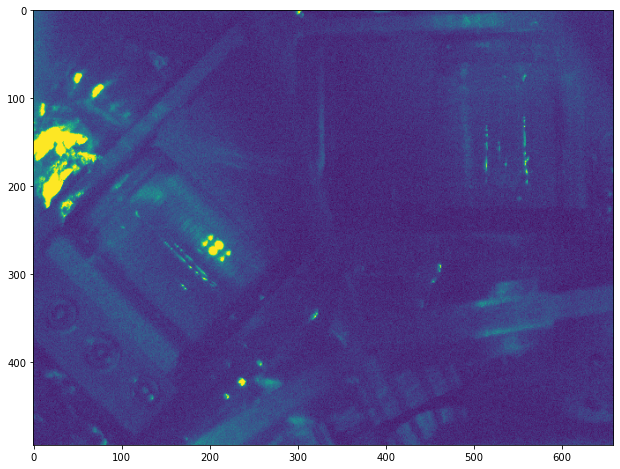

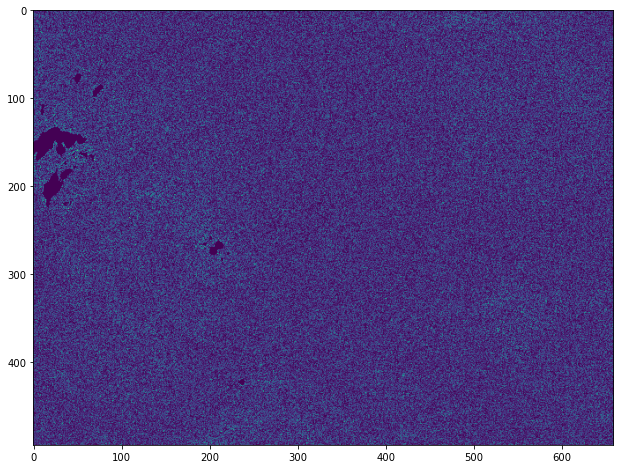

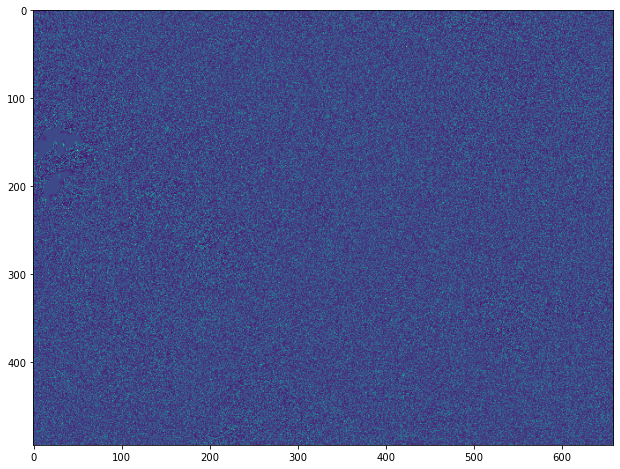

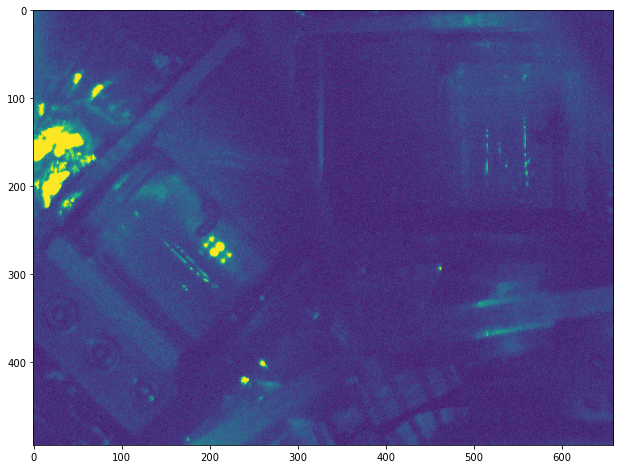

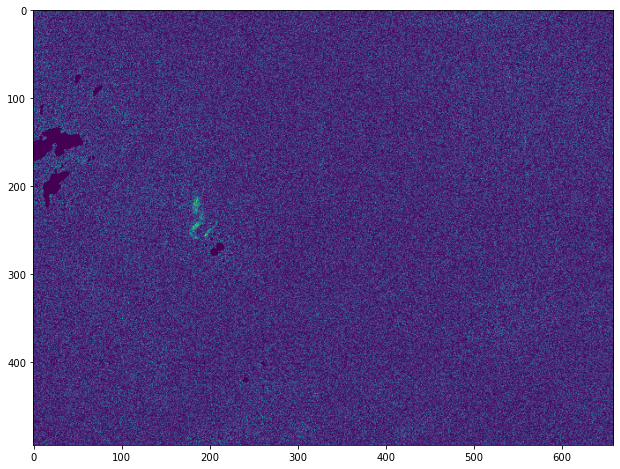

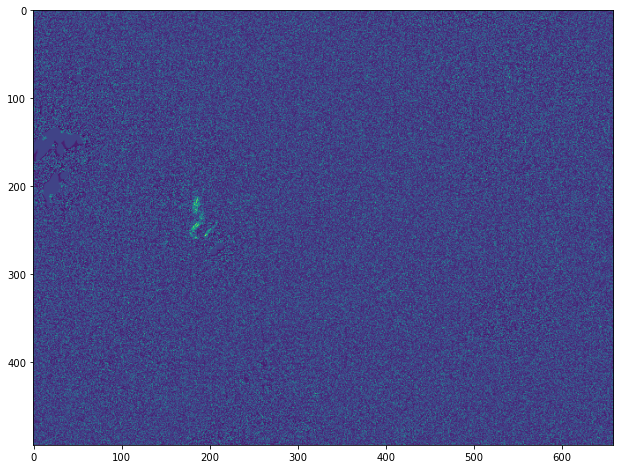

In [41]:
for f, N in zip([f0, f4], [0, 4]):
    subtraction_plots(f, N)